<a href="https://colab.research.google.com/github/garfield-gray/Calculations/blob/main/Decision_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initializing

In [2]:
!pip install feloopy

In [3]:
!pip install pyDecision

In [68]:
# importing the needed libraries
import numpy as np
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
# drive.mount('/content/drive')

#importing our decision matrix
worksheet = gc.open('Copy of Decision Making Project').sheet1
#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#Convert to a DataFrame
df = pd.DataFrame(rows)

In [69]:
datas=df.values.tolist()

In [70]:
for i in datas:
  del i[0]

In [71]:
attributes  = datas[0]

In [72]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,Attributes Universities,no. students,no. students per staff,International students,acceptance rate(according to US news),minimum GPA required,minimum toefl required,application fee,avg. salary after tax per month (according to ...,avg. cost of living for one person w/o rent (a...,population (according to livingcost.org)
1,Boston university,"27,618",11,"8,875",14,3,90,$80,"$6,020","1,092.00$",676000
2,University of Southern Calofornia (USC),"44,182",13.74673304,"11,947",12,3,90,$85,"$5,956","1,178.00$",3900000
3,New York University (NYU),"47,051",6.098639015,"17,335",12,3,100,$80,"$6,702","1,352.00$",8800000
4,Rensselaer Polytechnic Institute (RPI),"6,716",12.39114391,"1,312",65,3,88,$70,"$5,781",$706,514000
5,University of Miami,"17,815",5.858270306,"2,446",19,3,80,$70,"$4,379",$906,49200
6,Florida Polytechnic University,"1,593",18,303,47,2,80,$30,"$3,232",$817,113000
7,"University of California, Berkeley (UCB)","42,094",12.17645357,"10,273",11,3,90,$95,"$7,120",$959,124000
8,Texas A&M University,"64,752",21.23712693,"6,621",63,3,80,$90,"$4,231",$705,121000
9,Iowa State University,"25,718",15.66260658,"2,370",90,3,79,$100,"$3,746",$701,66400


In [73]:
# df.values.tolist()
universities = df.iloc[:,0].values.tolist()
del universities[0]

In [74]:
del datas[0]

In [75]:
#for cleaning the datas
def clean_and_convert(value):
    # Remove commas and dollar signs
    value = value.replace(',', '').replace('$', '')
    return value


In [76]:
df = df.drop(labels=0, axis=0)
df = df.drop(labels=0, axis=1)
df

,1,2,3,4,5,6,7,8,9,10
1,"27,618",11,"8,875",14,3,90,$80,"$6,020","1,092.00$",676000
2,"44,182",13.74673304,"11,947",12,3,90,$85,"$5,956","1,178.00$",3900000
3,"47,051",6.098639015,"17,335",12,3,100,$80,"$6,702","1,352.00$",8800000
4,"6,716",12.39114391,"1,312",65,3,88,$70,"$5,781",$706,514000
5,"17,815",5.858270306,"2,446",19,3,80,$70,"$4,379",$906,49200
6,"1,593",18,303,47,2,80,$30,"$3,232",$817,113000
7,"42,094",12.17645357,"10,273",11,3,90,$95,"$7,120",$959,124000
8,"64,752",21.23712693,"6,621",63,3,80,$90,"$4,231",$705,121000
9,"25,718",15.66260658,"2,370",90,3,79,$100,"$3,746",$701,66400


In [77]:
df.index = df.index - 1
df.columns = df.columns.astype(int) - 1

In [78]:
# Clean and convert DataFrame columns to float
cleaned_df = df.applymap(lambda x: float(clean_and_convert(x)) if isinstance(x, str) else x)

print(cleaned_df)

         0          1        2     3    4      5      6       7       8  \
0  27618.0  11.000000   8875.0  14.0  3.0   90.0   80.0  6020.0  1092.0   
1  44182.0  13.746733  11947.0  12.0  3.0   90.0   85.0  5956.0  1178.0   
2  47051.0   6.098639  17335.0  12.0  3.0  100.0   80.0  6702.0  1352.0   
3   6716.0  12.391144   1312.0  65.0  3.0   88.0   70.0  5781.0   706.0   
4  17815.0   5.858270   2446.0  19.0  3.0   80.0   70.0  4379.0   906.0   
5   1593.0  18.000000    303.0  47.0  2.0   80.0   30.0  3232.0   817.0   
6  42094.0  12.176454  10273.0  11.0  3.0   90.0   95.0  7120.0   959.0   
7  64752.0  21.237127   6621.0  63.0  3.0   80.0   90.0  4231.0   705.0   
8  25718.0  15.662607   2370.0  90.0  3.0   79.0  100.0  3746.0   701.0   

           9  
0   676000.0  
1  3900000.0  
2  8800000.0  
3   514000.0  
4    49200.0  
5   113000.0  
6   124000.0  
7   121000.0  
8    66400.0  


<ipython-input-78-60fb35eb4a06>:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [79]:
datasbib = np.array(cleaned_df)

In [80]:
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
# drive.mount('/content/drive')

#importing our final influence matrix
worksheet01 = gc.open('AHP Matrix').sheet1
#get_all_values gives a list of rows
rows = worksheet01.get_all_values()
#Convert to a DataFrame
df01 = pd.DataFrame(rows)

In [81]:
df01

,0,1,2,3,4,5,6,7,8,9,10
0,AHP Matrix,no. students,no. students per staff,International students,acceptance rate(according to US news),minimum GPA required,minimum toefl required,application fee,avg. salary after tax per month (according to ...,avg. cost of living for one person w/o rent (a...,population (according to livingcost.org)
1,no. students,1,0.1666666667,0.5,0.2,1,1,0.3333333333,0.1666666667,0.1666666667,1
2,no. students per staff,6,1,6,0.5,2,2,2,0.3333333333,0.3333333333,1
3,International students,2,0.1666666667,1,0.5,1,1,0.5,0.2,0.2,5
4,acceptance rate(according to US news),5,2,2,1,4,4,4,2,2,7
5,minimum GPA required,1,0.5,1,0.25,1,1,3,0.25,0.25,3
6,minimum toefl required,1,0.5,1,0.25,1,1,1,0.2,0.2,3
7,application fee,3,0.5,2,0.25,0.3333333333,1,1,0.2,0.2,5
8,avg. salary after tax per month (according to ...,6,3,5,0.5,4,5,5,1,1,9
9,avg. cost of living for one person w/o rent (a...,6,3,5,0.5,4,5,5,1,1,8


In [82]:
df01 = df01.drop(labels=0, axis=0)
df01 = df01.drop(labels=0, axis=1)
df01.index = df01.index - 1
df01.columns = df01.columns.astype(int) - 1
df01

,0,1,2,3,4,5,6,7,8,9
0,1,0.1666666667,0.5,0.2,1,1,0.3333333333,0.1666666667,0.1666666667,1
1,6,1,6,0.5,2,2,2,0.3333333333,0.3333333333,1
2,2,0.1666666667,1,0.5,1,1,0.5,0.2,0.2,5
3,5,2,2,1,4,4,4,2,2,7
4,1,0.5,1,0.25,1,1,3,0.25,0.25,3
5,1,0.5,1,0.25,1,1,1,0.2,0.2,3
6,3,0.5,2,0.25,0.3333333333,1,1,0.2,0.2,5
7,6,3,5,0.5,4,5,5,1,1,9
8,6,3,5,0.5,4,5,5,1,1,8
9,1,1,0.2,0.1428571429,0.3333333333,0.3333333333,0.2,0.1111111111,0.125,1


In [83]:
cleaned_df01 = df01.applymap(lambda x: float(clean_and_convert(x)) if isinstance(x, str) else x)


<ipython-input-83-ade268e02f3a>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [84]:
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
# drive.mount('/content/drive')

#importing our final influence matrix
worksheet02 = gc.open('final DEMATEL').sheet1
#get_all_values gives a list of rows
rows = worksheet02.get_all_values()
#Convert to a DataFrame
df02 = pd.DataFrame(rows)

In [85]:
cleaned_df02 = df02.applymap(lambda x: float(clean_and_convert(x)) if isinstance(x, str) else x)


<ipython-input-85-fe5215472641>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



#First part (DEMATEL + VIKOR)

##performing DEMATEL for weighting

QUADRANT I has the Most Important Criteria (Prominence: High, Relation: High)
QUADRANT II has Important Criteira that can be Improved by Other Criteria (Prominence: Low, Relation: High)
QUADRANT III has Criteria that are not Important (Prominence: Low, Relation: Low)
QUADRANT IV has Important Criteria that cannot be Improved by Other Criteria (Prominence: High, Relation: Low)

g1: Quadrant IV
g2: Quadrant I
g3: Quadrant I
g4: Quadrant IV
g5: Quadrant II
g6: Quadrant II
g7: Quadrant III
g8: Quadrant IV
g9: Quadrant III
g10: Quadrant II


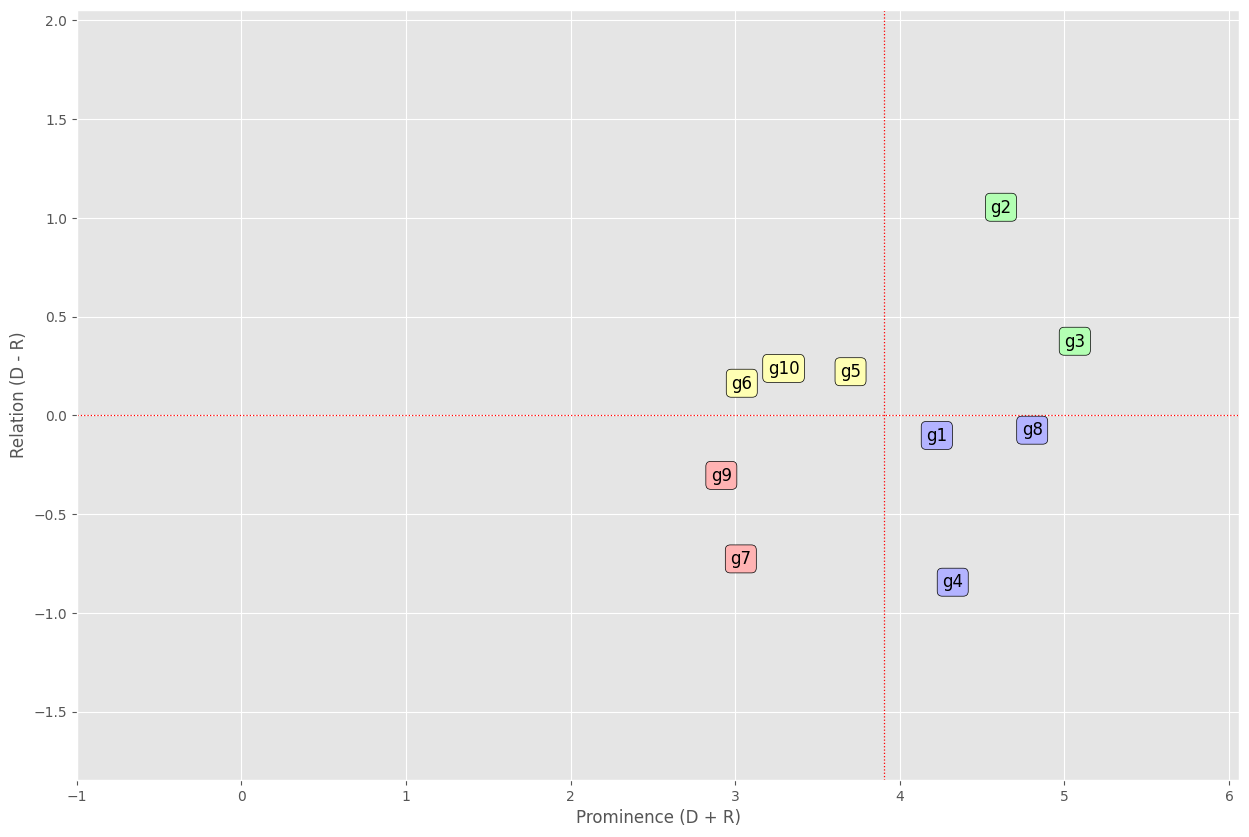

In [86]:
from pyDecision.algorithm import dematel_method
# Call DEMATEL Function
D_plus_R, D_minus_R, weightsDEMATEL = dematel_method(cleaned_df02, size_x = 15, size_y = 10)

In [87]:
# Criteira Weights
for i in range(0, weightsDEMATEL.shape[0]):
  print('w(', attributes[i], '): ', round(weightsDEMATEL[i], 3))

w( no. students ):  0.108
w( no. students per staff ):  0.118
w( International students ):  0.13
w(  acceptance rate(according to US news) ):  0.111
w( minimum GPA required ):  0.095
w( minimum toefl required ):  0.078
w( application fee ):  0.078
w( avg. salary after tax per month (according to livingcost.org) ):  0.123
w( avg. cost of living for one person w/o rent (according to livingcost.org) ):  0.075
w( population (according to livingcost.org) ):  0.084


##Performing VIKOR

In [88]:
import matplotlib.pyplot as plt

def rankingangoolshode(flow):
    rank_xy = np.zeros((flow.shape[0], 2))
    for i in range(0, rank_xy.shape[0]):
        rank_xy[i, 0] = 0
        rank_xy[i, 1] = flow.shape[0]-i
    for i in range(0, rank_xy.shape[0]):
        plt.text(rank_xy[i, 0],  rank_xy[i, 1], universities[(int(flow[i,0]))-1], size = 12, ha = 'center', va = 'center', bbox = dict(boxstyle = 'round', ec = (0.0, 0.0, 0.0), fc = (0.8, 1.0, 0.8),))
    for i in range(0, rank_xy.shape[0]-1):
        plt.arrow(rank_xy[i, 0], rank_xy[i, 1], rank_xy[i+1, 0] - rank_xy[i, 0], rank_xy[i+1, 1] - rank_xy[i, 1], head_width = 0.01, head_length = 0.2, overhang = 0.0, color = 'black', linewidth = 0.9, length_includes_head = True)
    axes = plt.gca()
    axes.set_xlim([-1, +1])
    ymin = np.amin(rank_xy[:,1])
    ymax = np.amax(rank_xy[:,1])
    if (ymin < ymax):
        axes.set_ylim([ymin, ymax])
    else:
        axes.set_ylim([ymin-1, ymax+1])
    plt.axis('off')
    plt.show()
    return


a1: 1.0
a2: 5.0
a3: 7.0
a4: 4.0
a5: 9.0


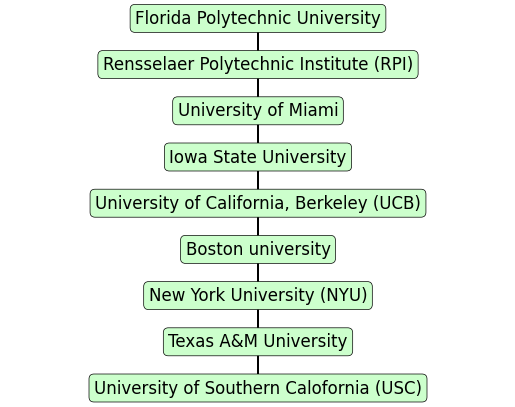

In [89]:
from pyDecision.algorithm import vikor_method, ranking
# Load Criterion Type: 'max' or 'min'
criterion_type = ['min', 'min', 'max', 'max','min', 'mim', 'min', 'max','min', 'min']

s, r, q, c_solution = vikor_method(cleaned_df, weightsDEMATEL, criterion_type, strategy_coefficient = 0.5, graph = False)
# Graph Solutions
rankingangoolshode(s)

#Second Part (AHP + TOPSIS)

##Performing AHP for weighting

In [90]:
# performing AHP
from pyDecision.algorithm import ahp_method
# Parameters
weight_derivation = 'max_eigen' # 'mean'; 'geometric' or 'max_eigen'
# Call AHP Function
weightsAHP, rc = ahp_method(cleaned_df01, wd = weight_derivation)

In [91]:
# Weigths
for i in range(0, weightsAHP.shape[0]):
  print('w(', attributes[i], '): ', round(weightsAHP[i], 3))

w( no. students ):  0.03
w( no. students per staff ):  0.108
w( International students ):  0.053
w(  acceptance rate(according to US news) ):  0.211
w( minimum GPA required ):  0.059
w( minimum toefl required ):  0.046
w( application fee ):  0.058
w( avg. salary after tax per month (according to livingcost.org) ):  0.205
w( avg. cost of living for one person w/o rent (according to livingcost.org) ):  0.203
w( population (according to livingcost.org) ):  0.027


##performimg TOPSIS

In [92]:
from pyDecision.algorithm import topsis_method

a1: 0.32
a2: 0.28
a3: 0.35
a4: 0.65
a5: 0.34
a6: 0.44
a7: 0.36
a8: 0.56
a9: 0.68


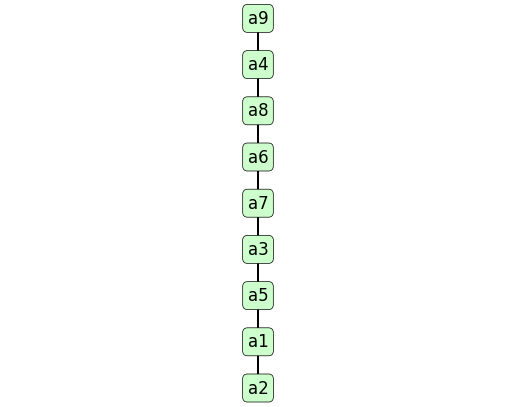

In [93]:
relative_closeness = topsis_method(cleaned_df, weightsAHP, criterion_type, graph = True, verbose = True)

In [94]:
def rankingangoolshode2(flow):
    rank_xy = np.zeros((flow.shape[0], 2))
    for i in range(0, rank_xy.shape[0]):
        rank_xy[i, 0] = 0
        rank_xy[i, 1] = flow.shape[0]-i
    for i in range(0, rank_xy.shape[0]):
        plt.text(rank_xy[i, 0],  rank_xy[i, 1],universities[(int(flow[i,0]))-1], size = 12, ha = 'center', va = 'center', bbox = dict(boxstyle = 'round', ec = (0.0, 0.0, 0.0), fc = (0.8, 1.0, 0.8),))
    for i in range(0, rank_xy.shape[0]-1):
        plt.arrow(rank_xy[i, 0], rank_xy[i, 1], rank_xy[i+1, 0] - rank_xy[i, 0], rank_xy[i+1, 1] - rank_xy[i, 1], head_width = 0.01, head_length = 0.2, overhang = 0.0, color = 'black', linewidth = 0.9, length_includes_head = True)
    axes = plt.gca()
    axes.set_xlim([-1, +1])
    ymin = np.amin(rank_xy[:,1])
    ymax = np.amax(rank_xy[:,1])
    if (ymin < ymax):
        axes.set_ylim([ymin, ymax])
    else:
        axes.set_ylim([ymin-1, ymax+1])
    plt.axis('off')
    plt.show()
    return

In [95]:
###############################################################################

# Required Libraries
import matplotlib.pyplot as plt
import numpy as np

###############################################################################

# Function: Rank
def ranking(flow):
    rank_xy = np.zeros((flow.shape[0], 2))
    for i in range(0, rank_xy.shape[0]):
        rank_xy[i, 0] = 0
        rank_xy[i, 1] = flow.shape[0]-i
    for i in range(0, rank_xy.shape[0]):
        plt.text(rank_xy[i, 0],  rank_xy[i, 1], 'a' + str(int(flow[i,0])), size = 12, ha = 'center', va = 'center', bbox = dict(boxstyle = 'round', ec = (0.0, 0.0, 0.0), fc = (0.8, 1.0, 0.8),))
    for i in range(0, rank_xy.shape[0]-1):
        plt.arrow(rank_xy[i, 0], rank_xy[i, 1], rank_xy[i+1, 0] - rank_xy[i, 0], rank_xy[i+1, 1] - rank_xy[i, 1], head_width = 0.01, head_length = 0.2, overhang = 0.0, color = 'black', linewidth = 0.9, length_includes_head = True)
    axes = plt.gca()
    axes.set_xlim([-1, +1])
    ymin = np.amin(rank_xy[:,1])
    ymax = np.amax(rank_xy[:,1])
    if (ymin < ymax):
        axes.set_ylim([ymin, ymax])
    else:
        axes.set_ylim([ymin-1, ymax+1])
    plt.axis('off')
    plt.show()
    return

# Function: TOPSIS
def topsis_methodkhodam(dataset, weights, criterion_type, graph = True, verbose = True):
    X = np.copy(dataset)
    w = np.copy(weights)
    sum_cols = np.sum(X*X, axis = 0)
    sum_cols = sum_cols**(1/2)
    r_ij = X/sum_cols
    v_ij = r_ij*w
    p_ideal_A = np.zeros(X.shape[1])
    n_ideal_A = np.zeros(X.shape[1])
    for i in range(0, dataset.shape[1]):
        if (criterion_type[i] == 'max'):
            p_ideal_A[i] = np.max(v_ij[:, i])
            n_ideal_A[i] = np.min(v_ij[:, i])
        else:
            p_ideal_A[i] = np.min(v_ij[:, i])
            n_ideal_A[i] = np.max(v_ij[:, i])
    p_s_ij = (v_ij - p_ideal_A)**2
    p_s_ij = np.sum(p_s_ij, axis = 1)**(1/2)
    n_s_ij = (v_ij - n_ideal_A)**2
    n_s_ij = np.sum(n_s_ij, axis = 1)**(1/2)
    c_i    = n_s_ij / ( p_s_ij  + n_s_ij )
    if (verbose == True):
        for i in range(0, c_i.shape[0]):
            print('a' + str(i+1) + ': ' + str(round(c_i[i], 2)))
    if ( graph == True):
        flow = np.copy(c_i)
        flow = np.reshape(flow, (c_i.shape[0], 1))
        flow = np.insert(flow, 0, list(range(1, c_i.shape[0]+1)), axis = 1)
        flow = flow[np.argsort(flow[:, 1])]
        flow = flow[::-1]
        rankingangoolshode2(flow)
    return c_i

###############################################################################


a1: 0.32
a2: 0.28
a3: 0.35
a4: 0.65
a5: 0.34
a6: 0.44
a7: 0.36
a8: 0.56
a9: 0.68


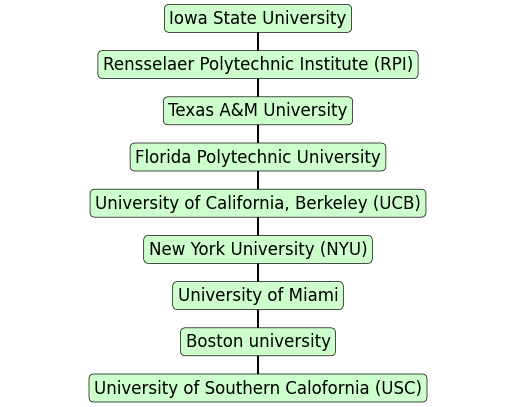

In [96]:
relative_closeness = topsis_methodkhodam(cleaned_df, weightsAHP, criterion_type, graph = True, verbose = True)

#Spider Graph

##Single Graphs

In [97]:
#normalizing the data with minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataframe
df_normalized = pd.DataFrame(scaler.fit_transform(cleaned_df), columns=cleaned_df.columns)

#getting the percentage
df_scaled = df_normalized * 100
rounded_df = df_scaled.round(2)  # Rounds to 2 decimal places
spiderdatas = rounded_df.values.tolist()

In [98]:
import plotly.express as px
import pandas as pd

Boston_university = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[0]))
fig = px.line_polar(data_frame = Boston_university, r = 'value', theta = 'criteria',
                    line_close = True, text = 'value', color_discrete_sequence = ['blue'])
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 100])))
fig.update_traces(fill='none', textposition='top center')
fig.show()

In [99]:
University_of_Southern_Calofornia_USC = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[1]))
fig = px.line_polar(data_frame = University_of_Southern_Calofornia_USC, r = 'value', theta = 'criteria',
                    line_close = True, text = 'value', color_discrete_sequence = ['blue'])
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 100])))
fig.update_traces(fill='none', textposition='top center')
fig.show()

In [100]:
New_York_University_NYU = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[2]))
fig = px.line_polar(data_frame = New_York_University_NYU, r = 'value', theta = 'criteria',
                    line_close = True, text = 'value', color_discrete_sequence = ['blue'])
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 100])))
fig.update_traces(fill='none', textposition='top center')
fig.show()

In [101]:
RPI = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[3]))
fig = px.line_polar(data_frame = RPI, r = 'value', theta = 'criteria',
                    line_close = True, text = 'value', color_discrete_sequence = ['blue'])
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 100])))
fig.update_traces(fill='none', textposition='top center')
fig.show()

In [102]:
University_of_Miami = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[4]))
fig = px.line_polar(data_frame = University_of_Miami, r = 'value', theta = 'criteria',
                    line_close = True, text = 'value', color_discrete_sequence = ['blue'])
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 100])))
fig.update_traces(fill='none', textposition='top center')
fig.show()

In [103]:
Florida_Polytechnic_University = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[5]))
fig = px.line_polar(data_frame = Florida_Polytechnic_University, r = 'value', theta = 'criteria',
                    line_close = True, text = 'value', color_discrete_sequence = ['blue'])
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 100])))
fig.update_traces(fill='none', textposition='top center')
fig.show()

In [104]:
Berkeley_UCB = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[6]))
fig = px.line_polar(data_frame = Berkeley_UCB, r = 'value', theta = 'criteria',
                    line_close = True, text = 'value', color_discrete_sequence = ['blue'])
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 100])))
fig.update_traces(fill='none', textposition='top center')
fig.show()

In [105]:
Texas_AM_University = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[7]))
fig = px.line_polar(data_frame = Texas_AM_University, r = 'value', theta = 'criteria',
                    line_close = True, text = 'value', color_discrete_sequence = ['blue'])
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 100])))
fig.update_traces(fill='none', textposition='top center')
fig.show()

In [106]:
Iowa_State_University = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[8]))
fig = px.line_polar(data_frame = Iowa_State_University, r = 'value', theta = 'criteria',
                    line_close = True, text = 'value', color_discrete_sequence = ['blue'])
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 100])))
fig.update_traces(fill='none', textposition='top center')
fig.show()

## multi Graph

In [108]:
# Data Prepration


Boston_university = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[0],
    University = ["Boston_university"]*len(attributes)))

University_of_Southern_Calofornia_USC = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[1],
    University = ["University_of_Southern_Calofornia_USC"]*len(attributes)))

New_York_University_NYU = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[2],
    University = ["New_York_University_NYU"]*len(attributes)))

RPI = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[3],
    University = ["RPI"]*len(attributes)))

University_of_Miami = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[4],
    University = ["University_of_Miami"]*len(attributes)))


Florida_Polytechnic_University = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[5],
    University = ["Florida_Polytechnic_University"]*len(attributes)))

Berkeley_UCB = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[6],
    University = ["Berkeley_UCB"]*len(attributes)))

Texas_AM_University = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[7],
    University = ["Texas_AM_University"]*len(attributes)))

Iowa_State_University = pd.DataFrame(dict(
    criteria = attributes ,
    value = spiderdatas[8],
    University = ["Iowa_State_University"]*len(attributes)))

combined_df = pd.concat([Boston_university,
                         University_of_Southern_Calofornia_USC,
                         New_York_University_NYU,
                         RPI,
                         University_of_Miami,
                         Florida_Polytechnic_University,
                         Berkeley_UCB,
                         Texas_AM_University,
                         Iowa_State_University])



In [110]:
fig = px.line_polar(combined_df, r='value', theta='criteria', color='University',
                    line_close=True, text='value', color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark")

fig.show()